In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz

In [2]:
wine = load_wine()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [3]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9814814814814815

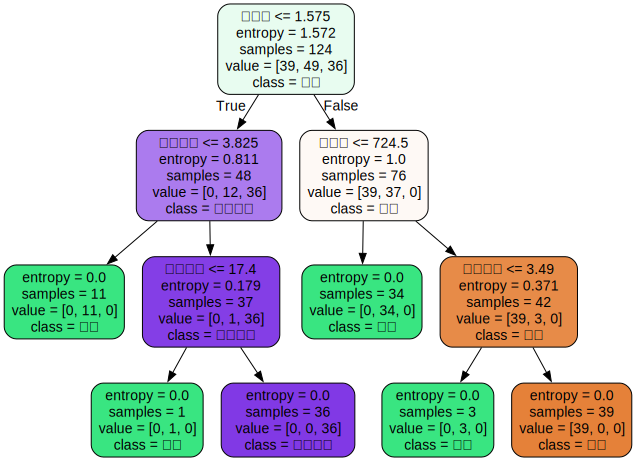

In [4]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁',
                '总酚','类黄酮','非黄烷类酚类','花青素',
                '颜色强度','色调','od280/od315稀释葡萄酒',
                '肺氨酸']
dot_data = tree.export_graphviz(clf
                               ,feature_names = feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True #颜色
                               ,rounded=True #形状
                               )
graph = graphviz.Source(dot_data)
graph

In [5]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0340211384599503),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.41060552707466386),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.24570529156093057),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('肺氨酸', 0.3096680429044553)]

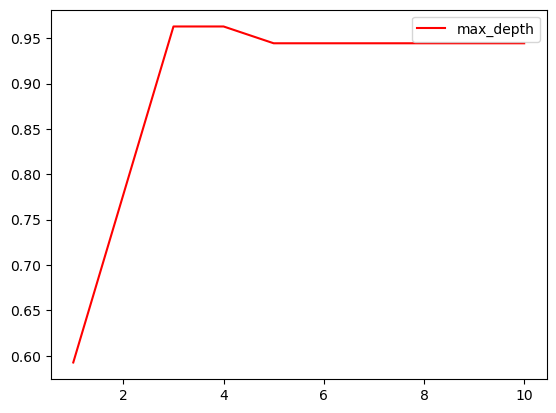

In [6]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()